In [158]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt
from sqlalchemy import create_engine, inspect, func

In [159]:
import numpy as np
import pandas as pd
import scipy.stats as sts
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [160]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [161]:
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [162]:
# reflect an existing database into a new model
Base = automap_base()

# reflect the tables
Base.prepare(engine, reflect=True)

In [163]:
# We can view all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [164]:
 # Use engine execute to select and display measurement table
result = engine.execute("select *  from measurement").fetchall()
print(result[:5])

[(1, 'USC00519397', '2010-01-01', 0.08, 65.0), (2, 'USC00519397', '2010-01-02', 0.0, 63.0), (3, 'USC00519397', '2010-01-03', 0.0, 74.0), (4, 'USC00519397', '2010-01-04', 0.0, 76.0), (5, 'USC00519397', '2010-01-06', None, 73.0)]


In [165]:
# Use engine execute to select and display station table
result = engine.execute("select *  from station").fetchall()
print(result[:5])

[(1, 'USC00519397', 'WAIKIKI 717.2, HI US', 21.2716, -157.8168, 3.0), (2, 'USC00513117', 'KANEOHE 838.1, HI US', 21.4234, -157.8015, 14.6), (3, 'USC00514830', 'KUALOA RANCH HEADQUARTERS 886.9, HI US', 21.5213, -157.8374, 7.0), (4, 'USC00517948', 'PEARL CITY, HI US', 21.3934, -157.9751, 11.9), (5, 'USC00518838', 'UPPER WAHIAWA 874.3, HI US', 21.4992, -158.0111, 306.6)]


In [166]:
# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [167]:
# Create our session (link) from Python to the DB
session = Session(engine)

In [168]:
# Explore the database and print the table names using Inspector
inspector = inspect(engine)
inspector.get_table_names()

['measurement', 'station']

# Exploratory Climate Analysis

In [169]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results

# Calculate the date 1 year ago from the last data point in the database

# Perform a query to retrieve the data and precipitation scores

# Save the query results as a Pandas DataFrame and set the index to the date column

# Sort the dataframe by date

# Use Pandas Plotting with Matplotlib to plot the data

## Precipitation Analysis

In [170]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results
#Define the last date 
last_date = engine.execute('SELECT max(date) FROM measurement').fetchone()
last_date

('2017-08-23',)

In [171]:
# Calculate the date 1 year ago from the last data point in the database
last_12 = (dt.datetime.strptime(last_date[0], '%Y-%m-%d') - dt.timedelta(days=365)).date()
last_12

datetime.date(2016, 8, 23)

In [172]:
# Perform a query to retrieve the data and precipitation scores
precip_data = session.query(Measurement.date, Measurement.prcp).\
    filter(Measurement.date >= last_12).\
order_by(Measurement.date).all()
precip_data

[('2016-08-23', 0.0),
 ('2016-08-23', 0.15),
 ('2016-08-23', 0.05),
 ('2016-08-23', None),
 ('2016-08-23', 0.02),
 ('2016-08-23', 1.79),
 ('2016-08-23', 0.7),
 ('2016-08-24', 0.08),
 ('2016-08-24', 2.15),
 ('2016-08-24', 2.28),
 ('2016-08-24', None),
 ('2016-08-24', 1.22),
 ('2016-08-24', 2.15),
 ('2016-08-24', 1.45),
 ('2016-08-25', 0.08),
 ('2016-08-25', 0.08),
 ('2016-08-25', 0.0),
 ('2016-08-25', 0.0),
 ('2016-08-25', 0.21),
 ('2016-08-25', 0.06),
 ('2016-08-25', 0.11),
 ('2016-08-26', 0.0),
 ('2016-08-26', 0.03),
 ('2016-08-26', 0.02),
 ('2016-08-26', 0.04),
 ('2016-08-26', 0.0),
 ('2016-08-26', 0.01),
 ('2016-08-27', 0.0),
 ('2016-08-27', 0.18),
 ('2016-08-27', 0.02),
 ('2016-08-27', 0.0),
 ('2016-08-27', 0.12),
 ('2016-08-27', None),
 ('2016-08-28', 0.01),
 ('2016-08-28', 0.14),
 ('2016-08-28', 0.14),
 ('2016-08-28', 0.14),
 ('2016-08-28', 0.6),
 ('2016-08-28', 2.07),
 ('2016-08-29', 0.0),
 ('2016-08-29', 0.17),
 ('2016-08-29', 0.04),
 ('2016-08-29', None),
 ('2016-08-29', 0.0),

In [173]:
# Save the query results as a Pandas DataFrame and set the index to the date column
precip_df = pd.DataFrame(precip_data)
precip_df = precip_df.rename(columns={"prcp":"Precip"})
precip_df.head()

,date,Precip
0,2016-08-23,0.00
1,2016-08-23,0.15
2,2016-08-23,0.05
3,2016-08-23,NaN
4,2016-08-23,0.02


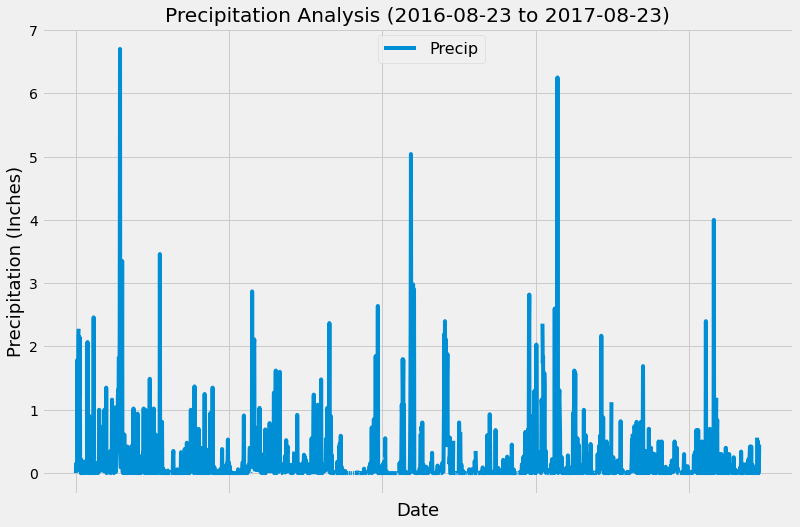

In [195]:
# Use Pandas Plotting with Matplotlib to plot the data
ax = precip_df.plot(figsize=(12,8))
plt.legend(bbox_to_anchor=(.6,1.001), fontsize="16")
ax.set_title(f"Precipitation Analysis ({(last_12)} to {last_date[0]})")
ax.xaxis.set_major_formatter(plt.NullFormatter())
ax.set_xlabel('Date', size=18)
plt.ylabel("Precipitation (Inches)", size=18)
plt.savefig("./Images/Precipitation_12m.png")
plt.show()

In [175]:
# Use Pandas to calcualte the summary statistics for the precipitation data
precip_df.describe()

,Precip
count,2021.000000
mean,0.177279
std,0.461190
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


## Station Analysis

In [176]:
# Design a query to show how many stations are available in this dataset?
total_stats = session.query(Station.id).count()
print("Stations availables: {}".format(total_stats))

Stations availables: 9


In [177]:
# What are the most active stations? (i.e. what stations have the most rows)?
# List the stations and the counts in descending order.
active_stats = session.query(Measurement.station,
                  func.count(Measurement.station))\
.group_by(Measurement.station)\
.order_by(func.count(Measurement.station).desc()).limit(6).all()
print(f"The most active stations are: ")
for station in active_stats:
    print(f"   {station[0]} with total count: {station[1]} ")   

The most active stations are: 
   USC00519281 with total count: 2772 
   USC00519397 with total count: 2724 
   USC00513117 with total count: 2709 
   USC00519523 with total count: 2669 
   USC00516128 with total count: 2612 
   USC00514830 with total count: 2202 


In [178]:
# Using the station id from the previous query, calculate the lowest temperature recorded, 
# highest temperature recorded, and average temperature most active station?
new_station = active_stats[0][0]
summ_stat=session.query(func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)).\
                filter(Measurement.station == new_station).all()

print(f" Most Active Station ID: {active_stats[0][0]}")
print(f" Minimum Tempeture: {summ_stat[0][0]}")
print(f" Average Tempeture: {summ_stat[0][1]}")
print(f" Maximum Tempeture: {summ_stat[0][2]}")

 Most Active Station ID: USC00519281
 Minimum Tempeture: 54.0
 Average Tempeture: 71.66378066378067
 Maximum Tempeture: 85.0


In [179]:
# Choose the station with the highest number of temperature observations.
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
temp_high = session.query(Measurement.tobs).\
                filter(Measurement.station==active_stats[0][0]).\
                filter(Measurement.date >= last_12).\
                                order_by(Measurement.date.desc()).all()
temp_high_df = pd.DataFrame(temp_high)
temp_high_df.head()

,tobs
0,79.0
1,76.0
2,76.0
3,77.0
4,77.0


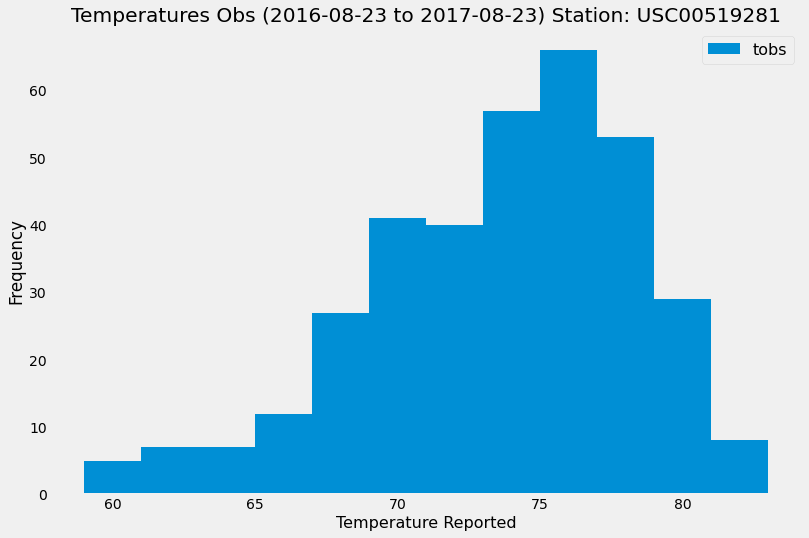

In [196]:
temp_high_df.plot.hist(by='station', bins=12, figsize=(12,8))
plt.grid()
plt.title(f"Temperatures Obs ({(last_12)} to {last_date[0]}) Station: { active_stats[0][0]}")
plt.xlabel("Temperature Reported", fontsize=16)
plt.legend(bbox_to_anchor=(1,1), fontsize=16)
plt.savefig("./Images/BestStatTemp.png")
plt.show()

## Bonus Challenge Assignment

## Temperature Analysis I

Hawaii is reputed to enjoy mild weather all year. Is there a meaningful difference between the temperature in, for example, June and December?

- It's almost 4 degrees Fahrenheit ... even though for me this difference is not really relevant, statistically speaking it is. 


In [184]:
june_df = pd.DataFrame(session.query(Measurement.date, Measurement.tobs).\
             filter(func.strftime('%m', Measurement.date)=='06').order_by(Measurement.date).all(), columns=['Date', 'Temp'])

dec_df = pd.DataFrame(session.query(Measurement.date, Measurement.tobs).\
             filter(func.strftime('%m', Measurement.date)=='12').order_by(Measurement.date).all(), columns=['Date', 'Temp'])

june_df.set_index('Date', inplace=True)
dec_df.set_index('Date', inplace=True)
#Combine June & Dec DF
combined_jd_df = june_df.join(dec_df, how='outer', lsuffix='_June', rsuffix='_Dec')
#Sort index
combined_jd_df.sort_index(inplace=True)
combined_jd_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3217 entries, 2010-06-01 to 2017-06-30
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Temp_June  1700 non-null   float64
 1   Temp_Dec   1517 non-null   float64
dtypes: float64(2)
memory usage: 75.4+ KB


Identify the average temperature in June at all stations across all available years in the dataset. Do the same for December temperature.

In [182]:
n_june_df=combined_jd_df['Temp_June'][combined_jd_df['Temp_June'].notna()]
n_dec_df=combined_jd_df['Temp_Dec'][combined_jd_df['Temp_Dec'].notna()]
avg_t_june = n_june_df.mean()
avg_t_dec = n_dec_df.mean()
print(f" Average Temp in June is: {avg_t_june}")
print(f" Average Temp in Dec is: {avg_t_dec}")
print(f" The difference of Temperature in Hawaii between Jun-Dec is: {avg_t_june-avg_t_dec}")

 Average Temp in June is: 74.94411764705882
 Average Temp in Dec is: 71.04152933421226
 The difference of Temperature in Hawaii between Jun-Dec is: 3.902588312846561


Use the t-test to determine whether the difference in the means, if any, is statistically significant. Will you use a paired t-test, or an unpaired t-test? Why?

In [183]:
sts.ttest_ind(n_june_df, n_dec_df, equal_var=False)

Ttest_indResult(statistic=31.35503692096242, pvalue=4.193529835915756e-187)

- An unpaired T test must be carried out because there is not the same number of elements in June and December, if the same amount of data were available in both months, a paired T test could be used.
- June has 1,700 elements and December has 1,517
- As the p-value is <0.05, we reject the null hypothesis, which means that the AVERAGE of these two months is different.
- We can conclude that the average temperature in June is statistically different (higher) than that of December.



## Temperature Analysis II

In [185]:
# This function called `calc_temps` will accept start date and end date in the format '%Y-%m-%d' 
# and return the minimum, average, and maximum temperatures for that range of dates
def calc_temps(start_date, end_date):
    """TMIN, TAVG, and TMAX for a list of dates.
    
    Args:
        start_date (string): A date string in the format %Y-%m-%d
        end_date (string): A date string in the format %Y-%m-%d
        
    Returns:
        TMIN, TAVE, and TMAX
    """
    
    return session.query(func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)).\
        filter(Measurement.date >= start_date).filter(Measurement.date <= end_date).all()

# function usage example
print(calc_temps('2012-02-28', '2012-03-05'))

[(62.0, 69.57142857142857, 74.0)]


In [186]:
# Use your previous function `calc_temps` to calculate the tmin, tavg, and tmax 
# for your trip using the previous year's data for those same dates.
s_date = '2015-02-28'
e_date = '2015-03-05'
c_temp = calc_temps(s_date, e_date)
c_temp_df = pd.DataFrame(c_temp, columns=['Min Temp', 'Avg Temp', 'Max Temp'])
avg_temp = c_temp_df['Avg Temp']
tmin_tmax_temp = c_temp_df.iloc[0]['Max Temp'] - c_temp_df.iloc[0]['Min Temp']
c_temp_df.head()

,Min Temp,Avg Temp,Max Temp
0,65.0,71.590909,78.0


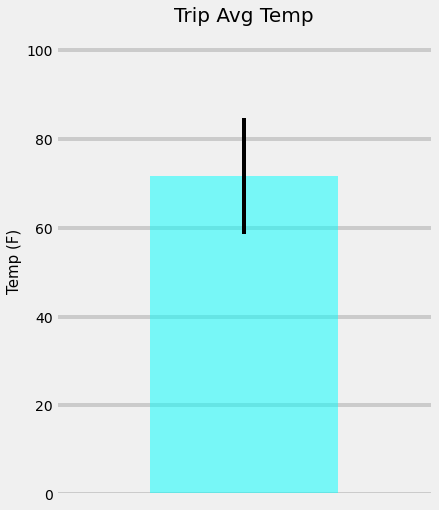

In [197]:
# Plot the results from your previous query as a bar chart. 
# Use "Trip Avg Temp" as your Title
# Use the average temperature for the y value
# Use the peak-to-peak (tmax-tmin) value as the y error bar (yerr)
avg_temp.plot(kind='bar', yerr=tmin_tmax_temp, figsize=(6,8), alpha=0.5, color='cyan')
plt.title("Trip Avg Temp", fontsize=20)
plt.ylabel("Temp (F)", fontsize=15)
plt.xticks([])
plt.ylim((0,105))
plt.grid( linestyle='-', linewidth=4)
plt.savefig("./Images/TripAvgTemp.png")
plt.show()

In [189]:
# Calculate the total amount of rainfall per weather station for your trip dates using the previous year's matching dates.
# Sort this in descending order by precipitation amount and list the station, name, latitude, longitude, and elevation

tot_precip_stat = session.query(Measurement.station,  func.sum(Measurement.prcp).label('Total_Precip')).\
filter((Measurement.date<=e_date) &(Measurement.date>=s_date)).\
group_by(Measurement.station).order_by(func.avg(Measurement.prcp).desc()).subquery()

results = session.query(tot_precip_stat.c.station, Station.name, Station.latitude, Station.longitude, Station.elevation, tot_precip_stat.c.Total_Precip).\
join(Station, Station.station == tot_precip_stat.c.station, isouter=True).all()

pd.DataFrame(results, columns=['Station', 'Station Name', 'Lat', 'Lng', 'Elevation', 'Total_Precip'])


,Station,Station Name,Lat,Lng,Elevation,Total_Precip
0,USC00516128,"MANOA LYON ARBO 785.2, HI US",21.33310,-157.80250,152.4,2.65
1,USC00519281,"WAIHEE 837.5, HI US",21.45167,-157.84889,32.9,2.02
2,USC00519523,"WAIMANALO EXPERIMENTAL FARM, HI US",21.33556,-157.71139,19.5,1.39
3,USC00513117,"KANEOHE 838.1, HI US",21.42340,-157.80150,14.6,1.16
4,USC00514830,"KUALOA RANCH HEADQUARTERS 886.9, HI US",21.52130,-157.83740,7.0,0.48
5,USC00519397,"WAIKIKI 717.2, HI US",21.27160,-157.81680,3.0,0.65
6,USC00511918,"HONOLULU OBSERVATORY 702.2, HI US",21.31520,-157.99920,0.9,0.17
7,USC00517948,"PEARL CITY, HI US",21.39340,-157.97510,11.9,0.00


In [125]:
# Create a query that will calculate the daily normals 
# (i.e. the averages for tmin, tmax, and tavg for all historic data matching a specific month and day)

def daily_normals(date):
    """Daily Normals.
    
    Args:
        date (str): A date string in the format '%m-%d'
        
    Returns:
        A list of tuples containing the daily normals, tmin, tavg, and tmax
    
    """
    
    sel = [func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)]
    return session.query(*sel).filter(func.strftime("%m-%d", Measurement.date) == date).all()
    
daily_normals("01-01")

[(62.0, 69.15384615384616, 77.0)]

In [126]:
# calculate the daily normals for your trip
# push each tuple of calculations into a list called `normals`

# Set the start and end date of the trip

# Use the start and end date to create a range of dates

# Stip off the year and save a list of %m-%d strings

# Loop through the list of %m-%d strings and calculate the normals for each date

normals = []
val_dates = dt.datetime.strptime(e_date, "%Y-%m-%d") - dt.datetime.strptime(s_date, "%Y-%m-%d")
dates = []
for val in range(val_dates.days+1):
    date = dt.datetime.strptime(s_date, "%Y-%m-%d") + dt.timedelta(days=val)
    dates.append(dt.datetime.strftime(date, "%Y-%m-%d"))
    tmin,tavg,tmax = np.ravel(daily_normals(dt.datetime.strftime(date, "%m-%d")))
    normals.append((tmin,tavg,tmax))
    

In [127]:
# Load the previous query results into a Pandas DataFrame and add the `trip_dates` range as the `date` index
normals_df = pd.DataFrame(normals, columns=['tmin', 'tavg', 'tmax'], index=dates)
normals_df

,tmin,tavg,tmax
2015-02-28,65.0,70.655172,80.0
2015-03-01,64.0,70.032787,76.0
2015-03-02,61.0,70.366667,78.0
2015-03-03,60.0,70.068966,78.0
2015-03-04,57.0,69.272727,77.0
2015-03-05,60.0,67.890909,76.0


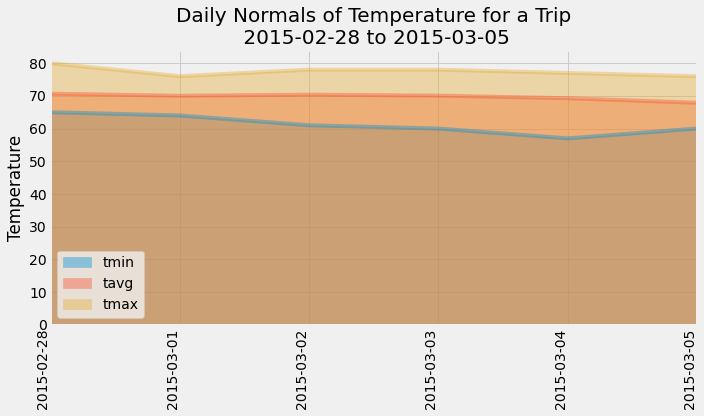

In [198]:
# Plot the daily normals as an area plot with `stacked=False`

fig, ax = plt.subplots(figsize=(10,6))
normals_df.plot.area(ax=ax, stacked=False, alpha=0.4)
plt.xticks(range(len(dates)), dates, rotation=90, ha='right')
plt.xlim((0,len(dates)-1))
plt.ylabel("Temperature")
plt.title(f"Daily Normals of Temperature for a Trip\n {s_date} to {e_date}", fontsize=20, y=1)
plt.tight_layout()
plt.savefig('./Images/NormalsTempTrip.png', bbox_inches = "tight" )

